# Analytic example of critical behaviour in scalar field collapse by Brady
##  Geoff Cope
##  Univeristy of Utah
##  January 4, 2022

https://iopscience.iop.org/article/10.1088/0264-9381/11/5/012/meta

In [1]:
from sympy import init_session
init_session(use_latex=True)

IPython console for SymPy 1.9 (Python 3.8.8-64-bit) (ground types: gmpy)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.9/



In [2]:
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

In [3]:
u,v,theta,phi,du,dv,dtheta,dphi = symbols( 'u v theta phi du dv dtheta dphi' ) 

In [4]:
r = Function('r')(u,v)
r

In [5]:
sigma = Function('sigma')(u,v)
sigma

In [6]:
variables = Matrix( [u,v,theta,phi] )
variables

⎡u⎤
⎢ ⎥
⎢v⎥
⎢ ⎥
⎢θ⎥
⎢ ⎥
⎣φ⎦

In [7]:
differentials = Matrix( [du,dv,dtheta,dphi] ) 
differentials

⎡  du  ⎤
⎢      ⎥
⎢  dv  ⎥
⎢      ⎥
⎢dtheta⎥
⎢      ⎥
⎣ dphi ⎦

In [9]:
lineElement = expand( - 2*exp(2*sigma)*du*dv +r**2 * (dtheta**2 + sin(theta)**2 * dphi**2 ) ) 
lineElement

In [10]:
g = zeros(4)

for i in range(4):
    for j in range(4):
        if i == j:
            g[i,j] = lineElement.coeff( differentials[i],2 ) 
        else:
            g[i,j] = Rational(1,2)*lineElement.coeff( differentials[i]*differentials[j],1 )
            
g

⎡               2⋅σ(u, v)                            ⎤
⎢     0       -ℯ              0             0        ⎥
⎢                                                    ⎥
⎢  2⋅σ(u, v)                                         ⎥
⎢-ℯ                0          0             0        ⎥
⎢                                                    ⎥
⎢                           2                        ⎥
⎢     0            0       r (u, v)         0        ⎥
⎢                                                    ⎥
⎢                                     2          2   ⎥
⎣     0            0          0      r (u, v)⋅sin (θ)⎦

In [11]:
import sympy

In [12]:
m = sympy.Array(g)
m

⎡               2⋅σ(u, v)                            ⎤
⎢     0       -ℯ              0             0        ⎥
⎢                                                    ⎥
⎢  2⋅σ(u, v)                                         ⎥
⎢-ℯ                0          0             0        ⎥
⎢                                                    ⎥
⎢                           2                        ⎥
⎢     0            0       r (u, v)         0        ⎥
⎢                                                    ⎥
⎢                                     2          2   ⎥
⎣     0            0          0      r (u, v)⋅sin (θ)⎦

In [13]:
from einsteinpy.symbolic import *

In [14]:
syms = sympy.symbols("u v theta phi")
u,v,theta,phi = syms

In [15]:
metric = MetricTensor(m,syms)

In [16]:
ch = ChristoffelSymbols.from_metric(metric)
ch.tensor()

⎡                                                                                                                                        
⎢                                                                                                                                        
⎢                                                                                                                                        
⎢                                                                                                                                        
⎢⎡  ∂                                                                                       ⎤  ⎡0        0                       0       
⎢⎢2⋅──(σ(u, v))  0                 0                                    0                   ⎥  ⎢                                         
⎢⎢  ∂u                                                                                      ⎥  ⎢     ∂                                   
⎢⎢                                

In [17]:
Ric = RicciTensor.from_metric(metric)
Ric.tensor()

⎡  ⎛                              2         ⎞                                                                                            
⎢  ⎜  ∂           ∂              ∂          ⎟                               2                                                            
⎢2⋅⎜2⋅──(r(u, v))⋅──(σ(u, v)) - ───(r(u, v))⎟                              ∂                                                             
⎢  ⎜  ∂u          ∂u              2         ⎟            2             2⋅─────(r(u, v))                                                  
⎢  ⎝                            ∂u          ⎠           ∂                ∂v ∂u                                                           
⎢────────────────────────────────────────────     - 2⋅─────(σ(u, v)) - ────────────────                                             0    
⎢                  r(u, v)                            ∂v ∂u                r(u, v)                                                       
⎢                                 

In [18]:
einst = EinsteinTensor.from_metric(metric)
einst.tensor()

⎡                                                ⎛                              2         ⎞                                              
⎢                                                ⎜  ∂           ∂              ∂          ⎟                                              
⎢                                              2⋅⎜2⋅──(r(u, v))⋅──(σ(u, v)) - ───(r(u, v))⎟                                              
⎢                                                ⎜  ∂u          ∂u              2         ⎟                                              
⎢                                                ⎝                            ∂u          ⎠                                              
⎢                                              ────────────────────────────────────────────                                              
⎢                                                                r(u, v)                                                                 
⎢                                 

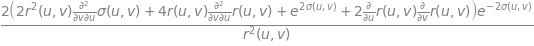

In [19]:
R = RicciScalar.from_riccitensor(Ric)
R.simplify()
R.expr

In [20]:
rm1 = RiemannCurvatureTensor.from_christoffels(ch)
rm1.tensor()

⎡                                                                                                                                        
⎢                                                                                                                                        
⎢                                                                                                                                        
⎢                                ⎡                        2                ⎤                                                             
⎢                                ⎢                       ∂                 ⎥                                                             
⎢                                ⎢       0          -2⋅─────(σ(u, v))  0  0⎥                                                             
⎢                                ⎢                     ∂v ∂u               ⎥                                                             
⎢                                ⎢

In [21]:
weyl = WeylTensor.from_metric(metric)
weyl.tensor()

⎡                                                                                                                                        
⎢                                                                                                                                        
⎢                                                                                                                                        
⎢                                                                                                                                        
⎢                                                                                                                                        
⎢                                                                                                                                        
⎢                                                                                                          ⎡0  0  0  0⎤                  
⎢                                 

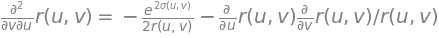

In [62]:
equation3 = Eq( diff(r,u,v) , expand(solve( Ric.tensor()[2,2].args[0], diff(r,u,v) )[0] ) )
equation3

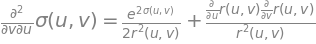

In [72]:
equation4 = Eq( diff(sigma,u,v) , expand( solve( simplify(einst.tensor())[2,2].args[1].subs(equation3.args[0],equation3.args[1]), diff(sigma,u,v) )[0]))
equation4

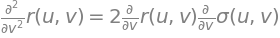

In [42]:
equation5 = Eq(diff(r,v,v), solve( einst.tensor()[1,1].args[2] , diff(r,v,v) )[0] ) 
equation5

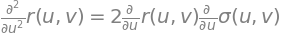

In [51]:
equation6 = Eq( diff(r,u,u) ,solve( einst.tensor()[0,0].args[2], diff(r,u,u) )[0] ) 
equation6

In [74]:
vacuumFieldEquations = Matrix([equation3,equation4,equation5,equation6])
vacuumFieldEquations

⎡                                ∂           ∂          ⎤
⎢   2                2⋅σ(u, v)   ──(r(u, v))⋅──(r(u, v))⎥
⎢  ∂                ℯ            ∂u          ∂v         ⎥
⎢─────(r(u, v)) = - ────────── - ───────────────────────⎥
⎢∂v ∂u              2⋅r(u, v)            r(u, v)        ⎥
⎢                                                       ⎥
⎢                               ∂           ∂           ⎥
⎢    2              2⋅σ(u, v)   ──(r(u, v))⋅──(r(u, v)) ⎥
⎢   ∂              ℯ            ∂u          ∂v          ⎥
⎢ ─────(σ(u, v)) = ────────── + ─────────────────────── ⎥
⎢ ∂v ∂u               2                  2              ⎥
⎢                  2⋅r (u, v)           r (u, v)        ⎥
⎢                                                       ⎥
⎢         2                                             ⎥
⎢        ∂               ∂           ∂                  ⎥
⎢       ───(r(u, v)) = 2⋅──(r(u, v))⋅──(σ(u, v))        ⎥
⎢         2              ∂v          ∂v                 ⎥
⎢       ∂v    